# Importing PyTorch ans setting up device


In [1]:
import torch
from torch import nn

torch.__version__

'2.2.1+cu121'

In [2]:
# Setting up device
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [3]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


# Creating custome data set using FOOD101 dataset with 101 classes

Using only 3 classes ---> pizza, steak and sushi.

With 75 images for training and 25 images for testing



In [4]:
import requests
import zipfile
from pathlib import Path

# Setting path to a data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"


# Creating image folder if it doesn't exist
if image_path.is_dir():
  print(f"{image_path} directory already exists")
else:
  print(f"{image_path} does not exist creating one..")
  image_path.mkdir(parents=True,exist_ok=True)

# Downloading pizza, steak and sushi data
with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
  request = requests.get("https://github.com/Ch-Praneeth1/Food_Classification_Using_CNN_With_Pytorch/raw/main/data/pizza_steak_sushi.zip")
  print("Downloading data form github")
  f.write(request.content)

# Unzipping the zip file
with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as res:
  print("Unzipping data")
  res.extractall(image_path)

data/pizza_steak_sushi does not exist creating one..
Unzipping data


In [5]:
image_path

PosixPath('data/pizza_steak_sushi')

# Data preparation and exporation

In [6]:
train_dir = image_path / "train"          # train and test dir path's
test_dir = image_path / "test"

print(train_dir,"----",test_dir)

data/pizza_steak_sushi/train ---- data/pizza_steak_sushi/test


# Visualizing the random image

1. Get all of the image paths
2. Pick a random image path using `random.choice()`
3. Get the image class name using `pathlib.Path.parent.stem`
4. Open the image and display

In [7]:
import random
from PIL import Image

# Set seed
random.seed(42)

# Get all of the image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))
image_path_list


[PosixPath('data/pizza_steak_sushi/train/steak/1976160.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/3857508.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/1621763.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/2013535.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/2561199.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/1225762.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/2878151.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/2222018.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/2163079.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/2017387.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/482022.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/2087958.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/2881783.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/2825100.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/1937872.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/3727491.jpg'),
 PosixPat

In [8]:
print(len(image_path_list))

300


random image path ---> data/pizza_steak_sushi/train/steak/2979061.jpg
image class ---> steak
image height ---> 512
image width ---> 512


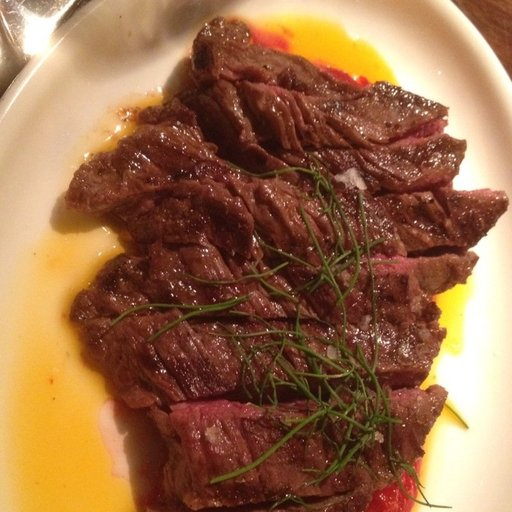

In [9]:
# Picking a random image path
random.seed(42)
random_img_path = random.choice(image_path_list)
print("random image path --->",random_img_path)

# Getting the image class form path name (directory name is the class name)

image_class = random_img_path.parent.stem
print("image class --->",image_class)

# Open image
img = Image.open(random_img_path)

# data about the image
print("image height --->",img.height)
print("image width --->",img.width)
img

# Plotting the same image using `matplotlib`

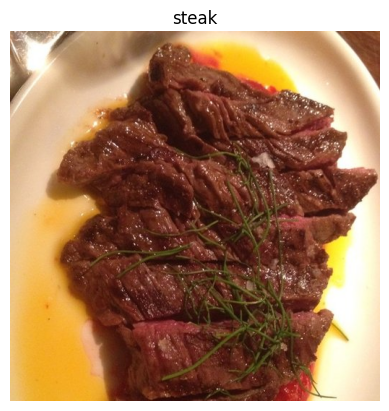

In [10]:
import numpy as np
import matplotlib.pyplot as plt

image_array = np.asarray(img)
# print(image_array)
plt.imshow(image_array)
plt.title(image_class)
plt.axis('off')
plt.show()

# Transforming data

1. Turn target data into tensors (images ka numerical representation)

2. Turn it into a `torch.utils.data.Dataset` and into `torch.utils.data.DataLoader` ( provides an iterable over a dataset )


In [11]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

### Transforming data with `torchvision.transforms`

1. `transforms.Compose` is used to compose multiple transforms at a time

2. `transforms.Resize` is used to resize the image

3. `transforms.RandomHorizontalFlip` is used to flip the image randomly on a horizontal scale

4. `transforms.ToTensor()` is used to convert the image into tensors

In [12]:
data_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

In [13]:
data_transform(img)

tensor([[[0.6549, 0.6902, 0.7608,  ..., 0.4902, 0.5216, 0.5490],
         [0.7098, 0.7059, 0.8392,  ..., 0.4667, 0.4902, 0.5176],
         [0.7608, 0.7098, 0.8039,  ..., 0.4667, 0.4824, 0.4902],
         ...,
         [0.9255, 0.9333, 0.9373,  ..., 0.9804, 0.9529, 0.9333],
         [0.9216, 0.9294, 0.9333,  ..., 0.9725, 0.9490, 0.9294],
         [0.9176, 0.9294, 0.9294,  ..., 0.9608, 0.9412, 0.9255]],

        [[0.5255, 0.5804, 0.6745,  ..., 0.2667, 0.2980, 0.3176],
         [0.5686, 0.5961, 0.7725,  ..., 0.2471, 0.2627, 0.2824],
         [0.6627, 0.6039, 0.7255,  ..., 0.2471, 0.2588, 0.2667],
         ...,
         [0.7608, 0.7373, 0.7098,  ..., 0.8706, 0.8431, 0.8157],
         [0.7608, 0.7412, 0.7137,  ..., 0.8588, 0.8314, 0.8118],
         [0.7647, 0.7451, 0.7176,  ..., 0.8471, 0.8235, 0.8078]],

        [[0.4353, 0.5255, 0.6039,  ..., 0.1529, 0.1765, 0.1804],
         [0.4706, 0.5216, 0.7020,  ..., 0.1412, 0.1608, 0.1686],
         [0.5804, 0.5137, 0.6431,  ..., 0.1412, 0.1608, 0.

In [14]:
data_transform(img).shape

torch.Size([3, 64, 64])

In [15]:
data_transform(img).dtype

torch.float32

### Ploting the original image and transformed image


So that we can observe the difference between them

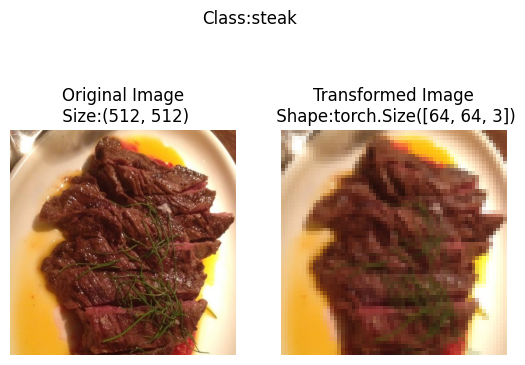

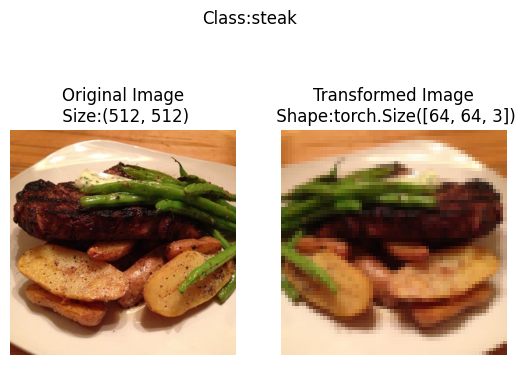

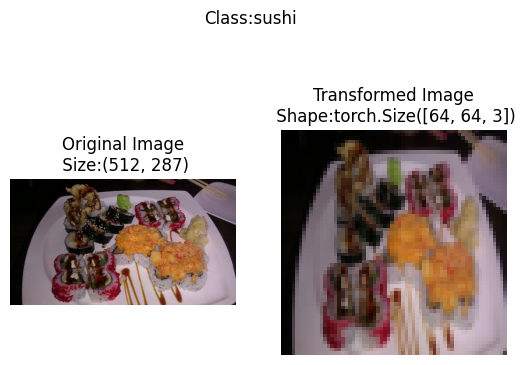

In [16]:
def plot_transformed_images(image_paths: list, transform, n=3, seed=42):
  """
  Selects random images(3) from a path of images and loads/transforms them
  then plots the original vs the transformed version of the image.
  """

  random.seed(seed)
  random_image_paths_for_diff = random.sample(image_paths, k=n)
  for image_path in random_image_paths_for_diff:
    with Image.open(image_path) as f:
      fig, ax = plt.subplots(nrows=1,ncols = 2)
      ax[0].imshow(f)
      ax[0].set_title(f"Original Image\n Size:{f.size}")
      ax[0].axis(False)

      # Transform and then plot the transformed image
      transformed_iamge = transform(f).permute(1,2,0)   # gives color channels first (we have to change the color channels to last for plotting the image using matplotlib)  (C, H, W) => (H, W, C)
      ax[1].imshow(transformed_iamge)
      ax[1].set_title(f"Transformed Image\n Shape:{transformed_iamge.shape}")
      ax[1].axis(False)

      fig.suptitle(f"Class:{image_path.parent.stem}")

plot_transformed_images(image_paths=image_path_list, transform=data_transform, n=3, seed=42)

# Loading image data using `ImageFolder`

We can load image classification data using `torchvision.datasets.ImageFolder`

In [17]:
from torchvision import datasets

train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform,  # transform for the data
                                  target_transform=None)     # transform for the lable

test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform,
                                 target_transform=None)

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [18]:
class_names = train_data.classes  # class names as a list
class_names
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

### Visualize an image form the train_data Dataset

Pick index on the train_data Dataset to get a single image and lable

In [19]:
train_data[0]

(tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
          [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
          [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
          ...,
          [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
          [0.0902, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
          [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],
 
         [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
          [0.0745, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
          [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
          ...,
          [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
          [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
          [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],
 
         [[0.0941, 0.0902, 0.0902,  ..., 0.0157, 0.0196, 0.0196],
          [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
          [0.0902, 0.0902, 0.0902,  ...,

In [20]:
img, lable = train_data[0][0], train_data[0][1]
print("Image Tensor --->",img)
print("Image Shape --->",img.shape)
print("Image dataType --->",img.dtype)
print("Image Lable --->",lable)
print("Image Lable Type --->",type(lable))

Image Tensor ---> tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
         [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
         [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
         ...,
         [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
         [0.0902, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],

        [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
         [0.0745, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
         [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
         ...,
         [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
         [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
         [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],

        [[0.0941, 0.0902, 0.0902,  ..., 0.0157, 0.0196, 0.0196],
         [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
         [0.0902, 0.0902, 0.0902,  ..., 

Text(0.5, 1.0, 'pizza')

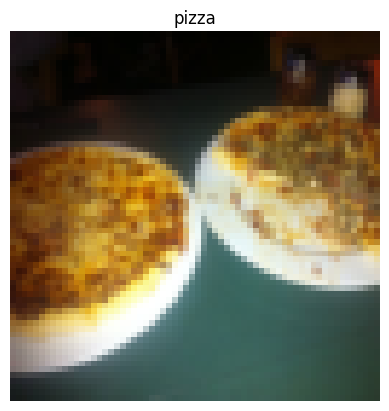

In [21]:
# Rearrange the order dimensions for plotting
img_permute = img.permute(1,2,0)

plt.imshow(img_permute)
plt.axis(False)
plt.title(class_names[lable])

### Train loaded images into DataLoader's

A `DataLoader` is going to help us turn our `DataSet`'s into iterables and we can customise the `batch_size`  images at a time


In [22]:
import os
os.cpu_count()

2

In [23]:
# Turn train and test datasets into DataLoader's
from torch.utils.data import DataLoader

BATCH_SIZE=32
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              num_workers=1,         # no of cpu calls to load the data
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             num_workers=1,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7c6818213a30>,
 <torch.utils.data.dataloader.DataLoader at 0x7c6818063ca0>)

In [24]:
len(train_dataloader),len(test_dataloader)

(8, 3)

In [25]:
img, label = next(iter(train_dataloader))

print("Image Shape --->",img.shape)   # [batch_size, color_channels, height, width]
print("Lable Shape --->",label.shape)

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Image Shape ---> torch.Size([32, 3, 64, 64])
Lable Shape ---> torch.Size([32])


# Building a CNN Model for image classification



In [26]:
class CNN_Model(nn.Module):
  """
  Model architecture of CNN for image classification from CNN EXPLAINER
  """
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):

    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                      stride=2)  # defualt stride value is same as kernel size in max pooling
    )

    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                      stride=2)  # defualt stride value is same as kernel size in max pooling
    )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = hidden_units*13*13,
                  out_features = output_shape)

    )


  def forward(self, x):
    x = self.conv_block_1(x)
    # print(x.shape)
    x = self.conv_block_2(x)
    # print(x.shape)
    x = self.classifier(x)
    # print(x.shape)
    return x
    # return self.classifier(self.conv_block_2(self.conv_block_1(x)))

In [27]:
torch.manual_seed(42)
model_0 = CNN_Model(input_shape=3,   # no of color channels
                    hidden_units=10,
                    output_shape=len(class_names)).to(device)

model_0

CNN_Model(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

### Trying a forward pass on a single batch of images to test the model

In [28]:
image_batch, label_batch = next(iter(train_dataloader))
image_batch.shape, label_batch.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [29]:
# try a forward pass
model_0(image_batch.to(device))

tensor([[ 2.0795e-02, -1.9510e-03,  9.5212e-03],
        [ 1.9347e-02,  3.1597e-03,  7.4474e-03],
        [ 1.7695e-02,  1.0282e-03,  9.4975e-03],
        [ 2.1068e-02, -2.6110e-03,  1.0277e-02],
        [ 1.9939e-02,  6.9131e-04,  1.0778e-02],
        [ 2.1281e-02,  2.0434e-03,  5.0046e-03],
        [ 2.0996e-02,  1.6415e-04,  1.2481e-02],
        [ 2.1566e-02, -1.9607e-03,  9.7175e-03],
        [ 2.4500e-02, -4.7904e-03,  8.5394e-03],
        [ 1.9275e-02, -1.7611e-04,  8.9663e-03],
        [ 1.9972e-02, -2.9622e-03,  8.2557e-03],
        [ 2.2318e-02, -2.1642e-03,  9.4428e-03],
        [ 2.1851e-02, -3.7225e-03,  8.3784e-03],
        [ 2.2881e-02, -1.7559e-03,  1.0299e-02],
        [ 2.1635e-02, -4.3995e-03,  9.4990e-03],
        [ 2.2589e-02, -3.4084e-03,  1.0640e-02],
        [ 2.0182e-02, -2.1775e-03,  9.5757e-03],
        [ 2.1698e-02, -2.7458e-03,  8.4966e-03],
        [ 1.9974e-02, -3.1665e-07,  8.4496e-03],
        [ 1.8308e-02,  1.6378e-03,  8.5491e-03],
        [ 1.7433e-02

# Using `torchinfo` to get an idea of the shapes going trough our model

In [30]:
!pip install torchinfo
import torchinfo
from torchinfo import summary

summary(model_0,input_size=[1,3,64,64])  # summary actually does the forward pass for the model we specified with the given input shape and then gives us the summery (if the input shape is wrong it throws an error)

Layer (type:depth-idx)                   Output Shape              Param #
CNN_Model                                [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 30, 30]           --
│    └─Conv2d: 2-1                       [1, 10, 62, 62]           280
│    └─ReLU: 2-2                         [1, 10, 62, 62]           --
│    └─Conv2d: 2-3                       [1, 10, 60, 60]           910
│    └─ReLU: 2-4                         [1, 10, 60, 60]           --
│    └─MaxPool2d: 2-5                    [1, 10, 30, 30]           --
├─Sequential: 1-2                        [1, 10, 13, 13]           --
│    └─Conv2d: 2-6                       [1, 10, 28, 28]           910
│    └─ReLU: 2-7                         [1, 10, 28, 28]           --
│    └─Conv2d: 2-8                       [1, 10, 26, 26]           910
│    └─ReLU: 2-9                         [1, 10, 26, 26]           --
│    └─MaxPool2d: 2-10                   [1, 10, 13, 13]           --
├─Sequentia

# Creating train and test loops functions


1. `train_step()` - takes in a model and dataloader and trains the model on the dataloader.

2. `test_step()` - takes in a model and dataloader and evaluate the model on the dataloader.

In [31]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device=device):
  # putting the model in train mode
  model.train()

  # setup train loss and train accuracy values
  train_loss, train_acc = 0, 0

  # loop through data loader data batches
  for batch, (X, y) in enumerate(dataloader):
    # print(batch)
    X, y = X.to(device), y.to(device)

    # 1. forward pass
    y_pred = model(X)

    # 2. calculate the loss
    loss = loss_fn(y_pred,y)
    train_loss +=loss.item()

    # 3. optimizer zero grad
    optimizer.zero_grad()

    # 4. loss backward
    loss.backward()

    # 5. optimizer step
    optimizer.step()

    y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1),dim=1)
    train_acc += (y_pred_class==y).sum().item()/len(y_pred)     # getting the totel num that are rigth ((y_pred_class==y).sum()) and then dividing by the len

  # avg loss and acc per batch
  train_loss = train_loss / len(dataloader)
  train_acc = train_acc / len(dataloader)
  return train_loss, train_acc

In [32]:
def test_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               device=device):
  # putting the model in eavl mode
  model.eval()

  # setup test loss and test accuracy values
  test_loss, test_acc = 0, 0

  with torch.inference_mode():      # used to track gradients
    # loop throught dataloader batches
    for batch, (X, y) in enumerate(dataloader):

      X, y = X.to(device), y.to(device)

      # 1. Forward pass
      test_pred_logits = model(X)

      # 2. Calculate the loss
      loss = loss_fn(test_pred_logits,y)
      test_loss += loss.item()

      # 3. calculate the acc
      test_pred_labels = test_pred_logits.argmax(dim=1)
      test_acc += ((test_pred_labels==y).sum().item()/len(test_pred_labels))


  # avg loss and acc per batch
  test_loss = test_loss / len(dataloader)
  test_acc = test_acc / len(dataloader)
  return test_loss, test_acc

# Creating a `trian()` function to combine `train_step()` and `test_step()`


In [33]:
def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int =5,
          device=device):

  results = {"train_loss":[],
             "train_acc":[],
             "test_loss":[],
             "test_acc":[]}

  for epoch in range(epochs):
    train_loss, train_acc = train_step(model=model,
                                       dataloader=train_dataloader,
                                       optimizer=optimizer,
                                       loss_fn = loss_fn,
                                       device=device)
    test_loss, test_acc = test_step(model=model,
                                       dataloader=test_dataloader,
                                       loss_fn=loss_fn,
                                       device=device)

    print(f"Epoch: {epoch}  |  Train Loss: {train_loss}  |  Train Acc: {train_acc} |  Test Loss: {test_loss}  |  Test Acc: {test_acc}")

    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

  return results


# Train and Evaluate the model

In [34]:
torch.manual_seed(42)
# torch.cuda.manual.seed(42)

NUM_EPOCHS = 5

model_0 = CNN_Model(input_shape=3,    # no of color channels
                    hidden_units=10,
                    output_shape=len(class_names)).to(device)

# setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(),
                             lr=0.001)

# Train model_0
model_0_results = train(model = model_0,
                        train_dataloader = train_dataloader,
                        test_dataloader = test_dataloader,
                        optimizer = optimizer,
                        loss_fn = loss_fn,
                        epochs = NUM_EPOCHS)



Epoch: 0  |  Train Loss: 1.1061925143003464  |  Train Acc: 0.3046875 |  Test Loss: 1.098137895266215  |  Test Acc: 0.30113636363636365
Epoch: 1  |  Train Loss: 1.0992151647806168  |  Train Acc: 0.328125 |  Test Loss: 1.0696112314860027  |  Test Acc: 0.5416666666666666
Epoch: 2  |  Train Loss: 1.0856071412563324  |  Train Acc: 0.3671875 |  Test Loss: 1.0795775254567463  |  Test Acc: 0.49242424242424243
Epoch: 3  |  Train Loss: 1.084572359919548  |  Train Acc: 0.38671875 |  Test Loss: 1.057015339533488  |  Test Acc: 0.6041666666666666
Epoch: 4  |  Train Loss: 1.0624022036790848  |  Train Acc: 0.3984375 |  Test Loss: 1.0681791702906291  |  Test Acc: 0.47253787878787873


In [35]:
# model_0_results

# Plot the loss curve for the model

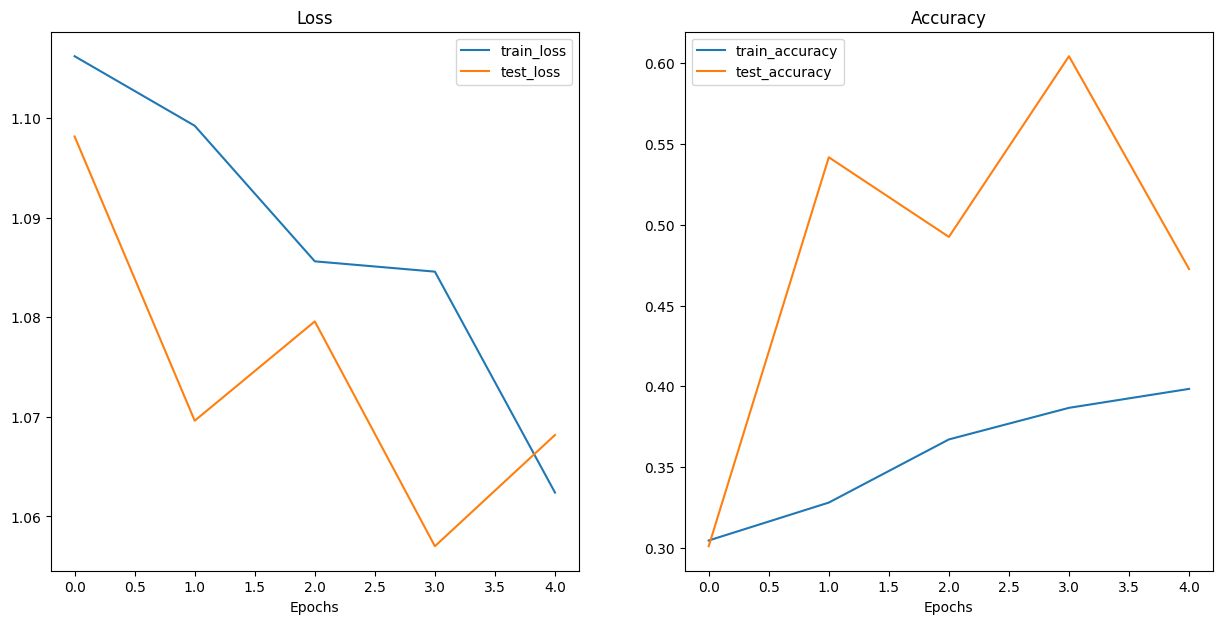

In [36]:
train_loss = model_0_results["train_loss"]
test_loss = model_0_results["test_loss"]

train_acc = model_0_results["train_acc"]
test_acc = model_0_results["test_acc"]

epochs = range(len(model_0_results["train_loss"]))

plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.plot(epochs,train_loss,label="train_loss")
plt.plot(epochs,test_loss,label="test_loss")
plt.title("Loss")
plt.xlabel("Epochs")
plt.legend()


plt.subplot(1,2,2)
plt.plot(epochs,train_acc,label="train_accuracy")
plt.plot(epochs,test_acc,label="test_accuracy")
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.legend()

In [37]:
import pandas as pd
model_0_df = pd.DataFrame(model_0_results)
model_0_df.head()

,train_loss,train_acc,test_loss,test_acc
0,1.106193,0.304688,1.098138,0.301136
1,1.099215,0.328125,1.069611,0.541667
2,1.085607,0.367188,1.079578,0.492424
3,1.084572,0.386719,1.057015,0.604167
4,1.062402,0.398438,1.068179,0.472538


# Making a prediction system

testing the model using an image that is not present in both train and test Dataset.



### Loading in a custome image with pytorch

1. We have to make sure our custome image is in the same format as the data our model was trained on

2. In tensor form with datatype (torch.float32)

3. Image of shape 64x64x3

4. On the rigth device

In [49]:
def food_prediction_system(model: torch.nn.Module,
                           custom_iamge_path,
                           class_names):

  custom_img = torchvision.io.read_image(custom_iamge_path).type(torch.float32)/255.
  print("image tensor",custom_img)
  print("image shape",custom_img.shape)
  print("image dtype",custom_img.dtype)

  # Create transform pipeline to resize image
  custome_image_transform = transforms.Compose([
      transforms.Resize(size=(64,64))
      ])

  # Transform the target image
  custom_img_transfromed = custome_image_transform(custom_img)
  print("Shape after tranform ---->",custom_img_transfromed.shape)
  custom_img_transfromed.unsqueeze(0).shape    # let's u to add a batch size

  # predicting the image using the model we have
  model.eval()
  with torch.inference_mode():
    custom_image_pred = model(custom_img_transfromed.unsqueeze(0))

  # converting logits -> prediction probabilities
  custom_image_pred_probs = torch.softmax(custom_image_pred, dim=1)

  # converting prediction probabilities -> predction labels
  custom_image_pred_labels = torch.argmax(custom_image_pred_probs, dim=1)
  return class_names,custom_image_pred_labels


In [53]:
class_names,custom_image_pred_labels = food_prediction_system(model_0,
                                                              custom_iamge_path,
                                                              class_names)

print(class_names,custom_image_pred_labels)

image tensor tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]],

        [[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]],

        [[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]]])
image shape torch.Size([3, 750, 500])
image dtype torch.float32
Shape after tranform ----> torch.Size([3, 64, 64])
['pizza', 'steak', 'sushi'] tensor([1])
